In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datasets import Dataset

In [2]:
# add color column to given data frame
def add_color_column(dataframe):
    colors = []
    for d in dataframe['label']:
        if d == 0:
            colors.append('grey')
        if d == 1:
            colors.append('orange')
        if d == 2:
            colors.append('red')
        if d == 3:
            colors.append('black')
        if d == 4:
            colors.append('purple')
        if d == 5:
            colors.append('blue')
        if d == 6:
            colors.append('darkgreen')
        if d == 7:
            colors.append('pink')
        if d == 8:
            colors.append('yellow')
        if d == 9:
            colors.append('brown')
        if d == 10:
            colors.append('green')
    # add them to the data frame
    dataframe['colors'] = colors

In [3]:
# load KMeans labels
labels = np.load('../data/cluster_labels.npy')

In [4]:
# load 3d distance matrix
distance_matrix_3d = np.load('../data/3d_distance_matrix_tsne.npy')

FileNotFoundError: [Errno 2] No such file or directory: '../data/3d_distance_matrix_tsne.npy'

In [7]:
# load data
videos = Dataset.load_from_disk('../data/videos')

In [13]:
# load 2d distance matrix
distance_matrix = np.load('../data/2d_distance_matrix_tsne.npy')

In [29]:
df_2d = pd.DataFrame(videos)
df_2d['label'] = labels
df_2d['x'] = distance_matrix[:,[0]]
df_2d['y'] = distance_matrix[:,[1]]
add_color_column(df_2d)

In [32]:
df_3d = pd.DataFrame(videos)
df_3d['label'] = labels
df_3d['x'] = distance_matrix_3d[:,[0]]
df_3d['y'] = distance_matrix_3d[:,[1]]
df_3d['z'] = distance_matrix_3d[:,[2]]
add_color_column(df_3d)

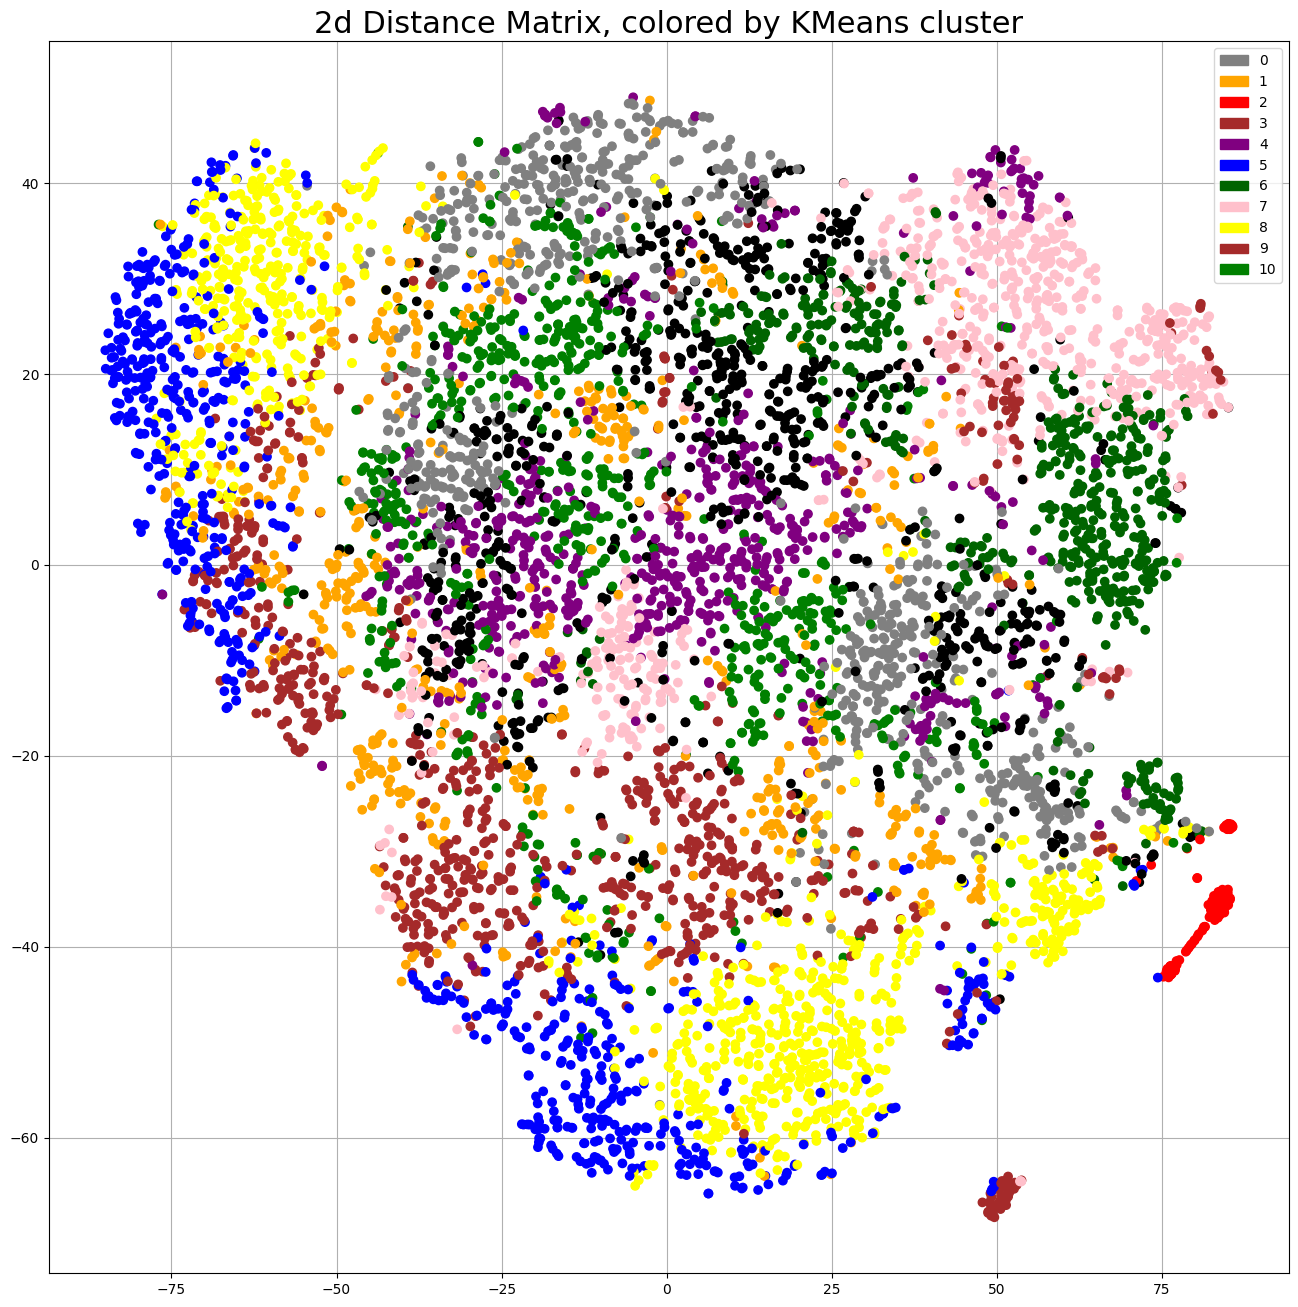

In [33]:
# Creating legend with color box
pop_a = mpatches.Patch(color='orange', label=1)
pop_b = mpatches.Patch(color='red', label=2)
pop_c = mpatches.Patch(color='brown', label=3)
pop_d = mpatches.Patch(color='purple', label=4)
pop_e = mpatches.Patch(color='blue', label=5)
pop_f = mpatches.Patch(color='darkgreen', label=6)
pop_g = mpatches.Patch(color='grey', label=0)
pop_h = mpatches.Patch(color='pink', label=7)
pop_i = mpatches.Patch(color='yellow', label=8)
pop_j = mpatches.Patch(color='brown', label=9)
pop_k = mpatches.Patch(color='green', label=10)
#make the plots look pretty
seaborn.set()
# create plot
fig, ax = plt.subplots(figsize=(16,16))
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df_2d['x'], df_2d['y'], c=df_2d['colors'])
# add title, legend
plt.title(f'2d Distance Matrix, colored by KMeans cluster', fontsize=22)
ax.legend(handles=[pop_g, pop_a, pop_b, pop_c, pop_d, pop_e, pop_f, pop_h, pop_i, pop_j, pop_k])

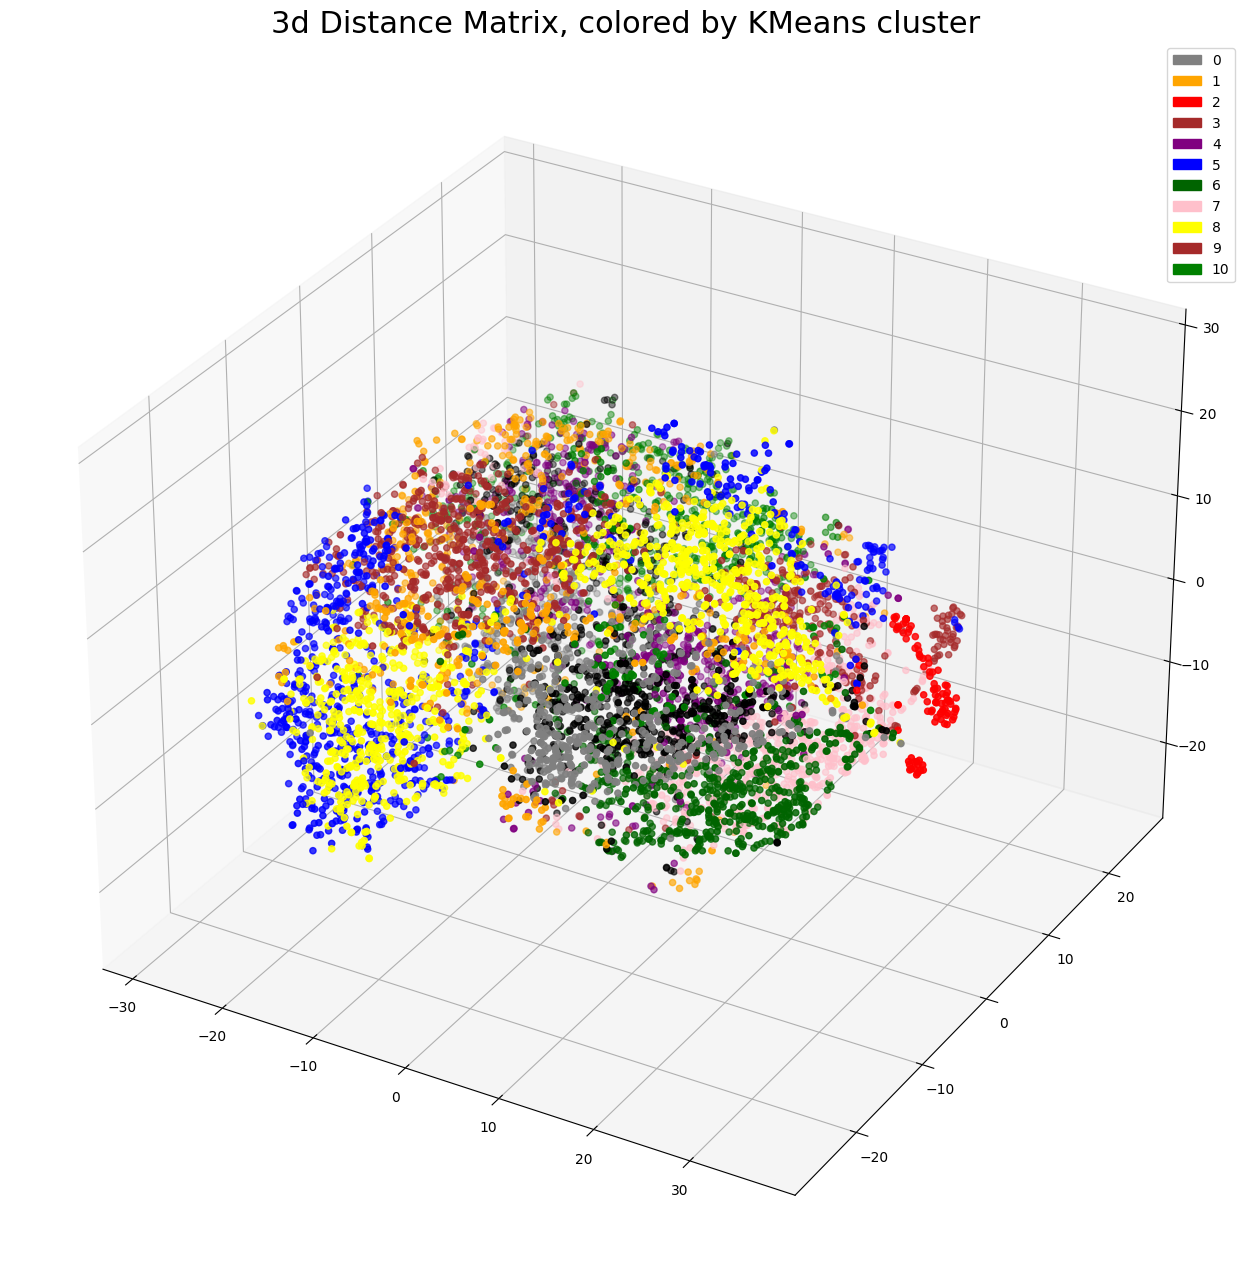

In [35]:
# Creating legend with color box
pop_a = mpatches.Patch(color='orange', label=1)
pop_b = mpatches.Patch(color='red', label=2)
pop_c = mpatches.Patch(color='brown', label=3)
pop_d = mpatches.Patch(color='purple', label=4)
pop_e = mpatches.Patch(color='blue', label=5)
pop_f = mpatches.Patch(color='darkgreen', label=6)
pop_g = mpatches.Patch(color='grey', label=0)
pop_h = mpatches.Patch(color='pink', label=7)
pop_i = mpatches.Patch(color='yellow', label=8)
pop_j = mpatches.Patch(color='brown', label=9)
pop_k = mpatches.Patch(color='green', label=10)
#make the plots look pretty
seaborn.set()
# create plot
figure = plt.figure(figsize=(16,16))
ax = figure.add_subplot(projection='3d')
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df_3d['x'], df_3d['y'], df_3d['z'], c=df_3d['colors'])
plt.title(f'3d Distance Matrix, colored by KMeans cluster', fontsize=22)
ax.legend(handles=[pop_g, pop_a, pop_b, pop_c, pop_d, pop_e, pop_f, pop_h, pop_i, pop_j, pop_k])